In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

In [22]:
#Define the matrix I
I = np.array([
    [3, 4, 1, 1, 4, 3],
    [3, 4, 4, 5, 0, 4],
    [4, 4, 3, 4, 5, 4],
    [1, 4, 5, 4, 0, 2],
    [3, 4, 5, 4, 5, 4],
    [2, 4, 3, 4, 2, 3]
])
# Calculate total pixels
total_pixels = I.size

# Print the total pixels
print(f"Total pixels: {total_pixels}")

Total pixels: 36


In [23]:
flattened = I.flatten() #Flatten the matrix

In [24]:
freq = Counter(flattened) #counter the frequency of each unique value

In [25]:
#Create a table for g and h(g)
table = pd.DataFrame(list(freq.items()), columns=['g', 'h(g)'])
table = table.sort_values(by='g').reset_index(drop=True)

In [26]:
#Display the table
print("Table of g and h(g):")
print(table)

Table of g and h(g):
   g  h(g)
0  0     2
1  1     3
2  2     3
3  3     7
4  4    16
5  5     5


In [27]:
P_g = {k: f / total_pixels for k, f in freq.items()} #Calculate total probability distribution

In [28]:
# Create a DataFrame with g, h(g), and P(g) 
table = pd.DataFrame({
    'g': list(freq.keys()),
    'h(g)': list(freq.values()),
    'P(g)': list(P_g.values())
})

In [29]:
# Sort the table by g
table = table.sort_values(by='g').reset_index(drop=True)

In [30]:
# Print the table
print(table)

   g  h(g)      P(g)
0  0     2  0.055556
1  1     3  0.083333
2  2     3  0.083333
3  3     7  0.194444
4  4    16  0.444444
5  5     5  0.138889


In [31]:
#Calculate Cumulative distribution function(CDF)
CDF = {}
cumulative = 0
for g in sorted(P_g.keys()):
    cumulative += P_g[g]
    CDF[g] = cumulative

In [32]:
# Add the CDF column
table['CDF(g)'] = table['P(g)'].cumsum()

In [33]:
# Display the updated table
print(table)

   g  h(g)      P(g)    CDF(g)
0  0     2  0.055556  0.055556
1  1     3  0.083333  0.138889
2  2     3  0.083333  0.222222
3  3     7  0.194444  0.416667
4  4    16  0.444444  0.861111
5  5     5  0.138889  1.000000


In [34]:
#Map intensities using s_g = round((L-1) * CDF(g))
L = 6  # Number of gray levels
mapping = {g: round((L - 1) * CDF[g]) for k in CDF.keys()}

In [35]:
# Add the s(g) column by applying the mapping
table['s(g)'] = table['g'].apply(lambda g: round((L - 1) * CDF[g]))

In [36]:
# Display the updated table
print(table)

   g  h(g)      P(g)    CDF(g)  s(g)
0  0     2  0.055556  0.055556     0
1  1     3  0.083333  0.138889     1
2  2     3  0.083333  0.222222     1
3  3     7  0.194444  0.416667     2
4  4    16  0.444444  0.861111     4
5  5     5  0.138889  1.000000     5


In [37]:
g_to_cdf_sg_mapping = []

for g in sorted(P_g.keys()):  # Iterate over all unique g
    cdf_value = CDF[g]  # Retrieve the CDF value for this g
    s_g = round((L - 1) * cdf_value)  # Calculate the equalized value s(g)
    g_to_cdf_sg_mapping.append({'g': g, 'CDF(g)': cdf_value, 's(g)': s_g})
    

mapping_table = pd.DataFrame(g_to_cdf_sg_mapping)
print("Mapping of g, CDF(g), and s(g):")
print(mapping_table)

Mapping of g, CDF(g), and s(g):
   g    CDF(g)  s(g)
0  0  0.055556     0
1  1  0.138889     1
2  2  0.222222     1
3  3  0.416667     2
4  4  0.861111     4
5  5  1.000000     5


In [38]:
#Need to map g and s(g) and update after mapping -> To create I equalized:
g_to_sg_mapping = {0: 0, 1: 1, 2: 1, 3: 2, 4: 4, 5: 5}
I_equalized = np.array([[g_to_sg_mapping[val] for val in row] for row in I])

In [39]:
# Print the original and equalized matrices
print("Original Matrix I:")
print(I)

print("Equalized Matrix I_equalized:")
print(I_equalized)

Original Matrix I:
[[3 4 1 1 4 3]
 [3 4 4 5 0 4]
 [4 4 3 4 5 4]
 [1 4 5 4 0 2]
 [3 4 5 4 5 4]
 [2 4 3 4 2 3]]
Equalized Matrix I_equalized:
[[2 4 1 1 4 2]
 [2 4 4 5 0 4]
 [4 4 2 4 5 4]
 [1 4 5 4 0 1]
 [2 4 5 4 5 4]
 [1 4 2 4 1 2]]


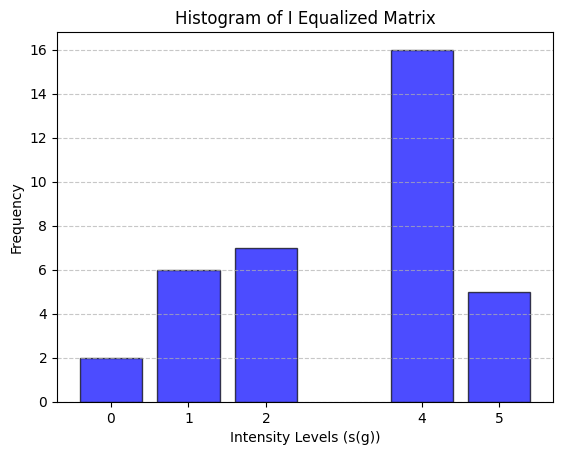

In [40]:
# Histogram for the equalized matrix
unique, counts = np.unique(I_equalized, return_counts=True)  # Get unique values and their frequencies

# Plot the histogram
plt.bar(unique, counts, color='blue', alpha=0.7, edgecolor='black')
plt.title("Histogram of I Equalized Matrix")
plt.xlabel("Intensity Levels (s(g))")
plt.ylabel("Frequency")
plt.xticks(unique)  # Ensure x-axis ticks show all intensity levels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()